In [ ]:
# 2023-08
# Penrose fractal "puzzle piece" design
# for laser cutter

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [372]:
from IPython.display import SVG, display

In [9]:
# COOL SHIT STARTS HERE

In [90]:
def flip(c):
    if c == 'L':
        return 'R'
    elif c == 'R':
        return 'L'
    else:
        return c
def next_pen(pen):
    a, b, c = pen
    return (b, 
            c, 
            b + 'R' + ''.join(reversed([flip(s) for s in c])) 
              + 'L' + a)

In [467]:
def rot(vec, th=0.3 * np.pi, flip=False):
    if flip:
        th *= -1
    return np.array([vec[0]*np.cos(th) - vec[1]*np.sin(th), 
                     vec[1]*np.cos(th) + vec[0]*np.sin(th)])

In [446]:
PHI = (1 + np.sqrt(5)) / 2
DEG = np.pi / 180

In [519]:
def edge_points(start, end, gen=0, flip=False):
    if flip:
        return [*reversed(edge_points(end, start, gen, False))]
    if gen <= 0:
        return [start, end]
    else:
        a = start + rot(end - start, th=36*DEG) / PHI**2
        b = a + rot(end - start, th=-36*DEG) / PHI
        return (edge_points(start, a, gen-2)[:-1] + 
                (edge_points(a, b, gen-1, flip=True)) + 
                edge_points(b, end, gen-3)[1:])

In [544]:
rot(unit, th=36*DEG) / PHI**2

array([0.30901699, 0.22451399])

In [448]:
start = np.random.randn(2)
end = np.random.randn(2)
a = start + rot(end - start, th=36*DEG) / PHI**2
b = a + rot(end - start, th=-36*DEG) / PHI
c = b + rot(end - start, th=36*DEG) / PHI**3
print(end, c)

[2.43243097 0.5832881 ] [2.43243097 0.5832881 ]


In [573]:
# A

def points_A(gen=0, orig=None):
    if orig is None:
        orig = np.array([0, 0])
    unit = np.array([1, 0])
    
    gr = (180-144)*DEG
    bl = (180-108)*DEG
    pr = (180-72)*DEG

    a = orig
    b = orig + unit
    c = b + rot(unit, th=-gr)
    d = c + rot(unit*PHI, th=-gr-bl)
    e = d + rot(unit*PHI, th=-gr-bl-gr)
    f = e + rot(unit*PHI**2, th=-gr-bl-gr-bl)

    return (edge_points(a, b, gen, True)[:-1] +
            edge_points(b, c, gen, False)[:-1] +
            edge_points(c, d, gen+1, True)[:-1] +
            edge_points(d, e, gen+1, False)[:-1] +
            edge_points(e, f, gen+2, True)[:-1] +
            edge_points(f, a, gen+2, False)[:-1])

In [574]:
# B

def points_B(gen=0, orig=None):
    if orig is None:
        orig = np.array([0, 0])
    unit = np.array([1, 0])
        
    gr = (180-144)*DEG
    bl = (180-108)*DEG
    pr = (180-72)*DEG

    a = orig
    b = orig + unit * PHI**3
    c = b + rot(unit*PHI, th=-bl)
    d = c + rot(unit*PHI**2, th=-bl-bl)
    e = d + rot(unit, th=-bl-bl-bl)
    f = e + rot(unit*PHI**2, th=-bl-bl-bl+gr)

    return (edge_points(a, b, gen+3, True)[:-1] +
            edge_points(b, c, gen+1, False)[:-1] +
            edge_points(c, d, gen+2, True)[:-1] +
            edge_points(d, e, gen, False)[:-1] +
            edge_points(e, f, gen+2, True)[:-1] +
            edge_points(f, a, gen+2, False)[:-1])

In [606]:
#points = edge_points(np.array([0, 0]), np.array([1, 0]), gen=15)

gen = 5

pointsA = points_A(gen)
pointsB = points_B(gen, orig=np.array([-1, 4]))

points = pointsA+pointsB
minx = min([pt[0] for pt in points])
miny = min([pt[1] for pt in points])
maxx = max([pt[0] for pt in points])
maxy = max([pt[1] for pt in points])

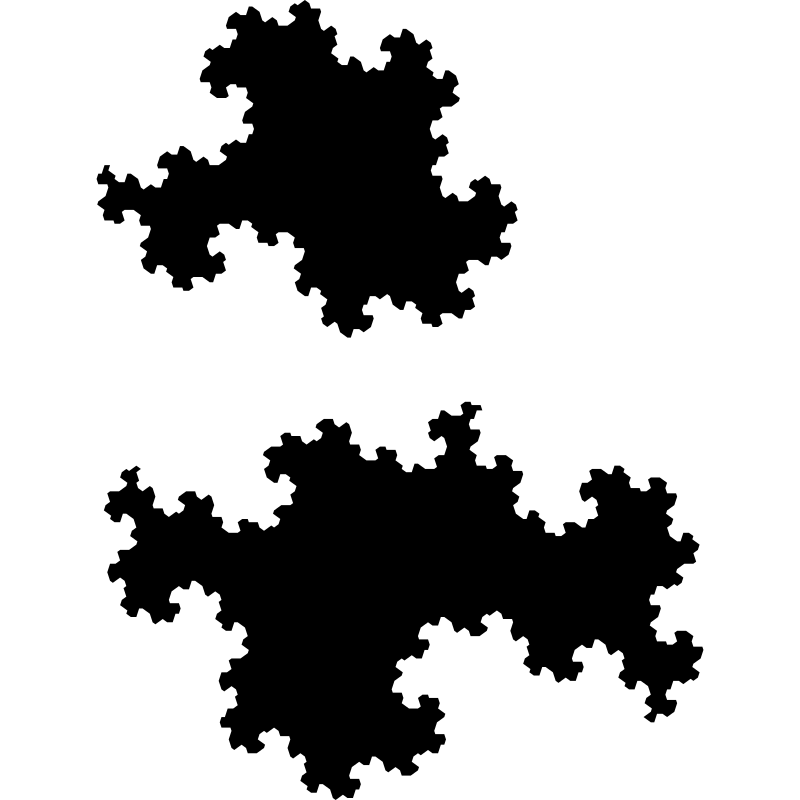

In [607]:
edictsvg = f"""\
<svg width="800" height="800" viewBox="{minx} {miny} {maxx-minx} {maxy-miny}">
<polyline points="{' '.join([f'{pt[0]},{pt[1]}' for pt in pointsA])}"/>
<polyline points="{' '.join([f'{pt[0]},{pt[1]}' for pt in pointsB])}"/>
</svg>"""
display(SVG(data=edictsvg))

In [608]:
with open(f'/home/adam/Dropbox/personal/projects/ipy/lasers/penrose_AB{gen}.svg', 'w') as f:
    f.write(edictsvg)

# L-system (didn't work)

In [476]:
size = 15

pen = 'FF', 'FFF', 'FFFFF'
for _ in range(size):
    pen = next_pen(pen)

In [496]:
turt = np.array([0, 0])
head = np.array([1, 0])
points = [turt]

for step in pen[-1] :
    if step == 'F':
        turt = turt + head
        points.append(turt)
    elif step == 'L':
        head = rot(head, th=0.85)
    elif step == 'R':
        head = rot(head, th=0.85, flip=True)

minx = min([pt[0] for pt in points])
miny = min([pt[1] for pt in points])
maxx = max([pt[0] for pt in points])
maxy = max([pt[1] for pt in points])

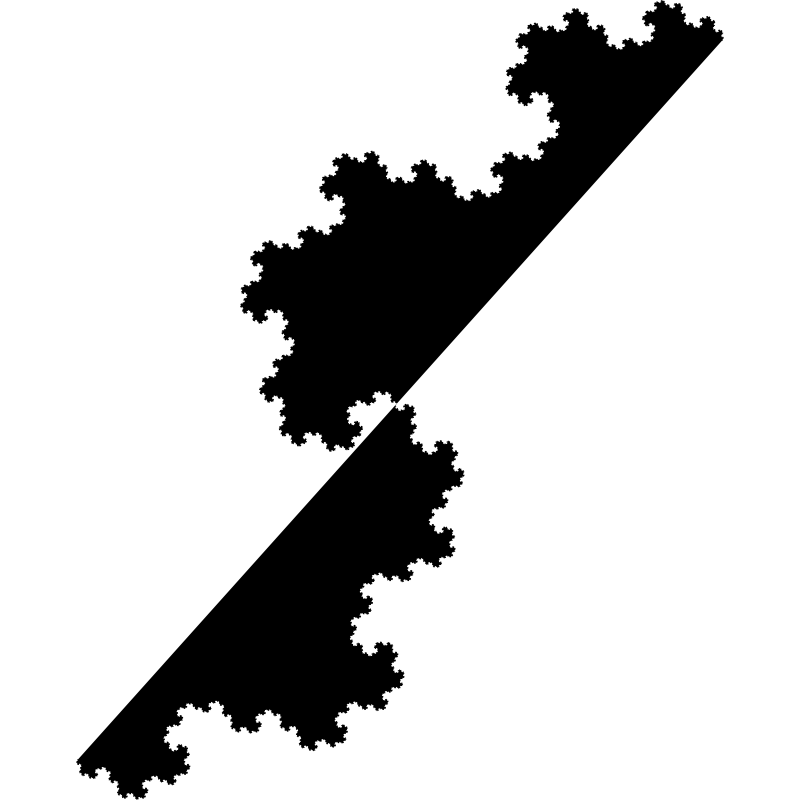

In [497]:
edictsvg = f"""\
<svg width="800" height="800" viewBox="{minx-1} {miny-1} {maxx-minx+2} {maxy-miny+2}">
<polyline points="{' '.join([f'{pt[0]},{pt[1]}' for pt in points])}"/>
</svg>"""
display(SVG(data=edictsvg))

In [339]:
with open(f'/home/adam/Dropbox/personal/projects/ipy/lasers/terdragon{size}.svg', 'w') as f:
    f.write(edictsvg)